In [15]:
using PyPlot; plt = PyPlot

import CMF
include("../src/separable.jl"); sep = Main.Separable;

### Load data

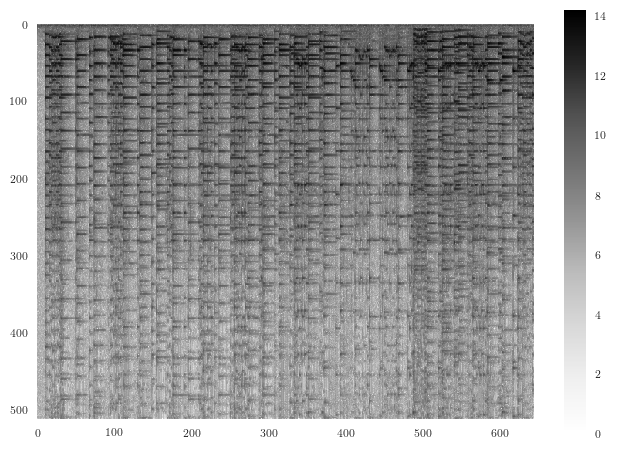

In [69]:
include("./sep_plot_settings.jl")

spect = log10.(CMF.piano())
data = spect .- minimum(spect)


plt.imshow(data)
plt.grid(false)
plt.colorbar()
plt.show()

### Fit separable algorithm

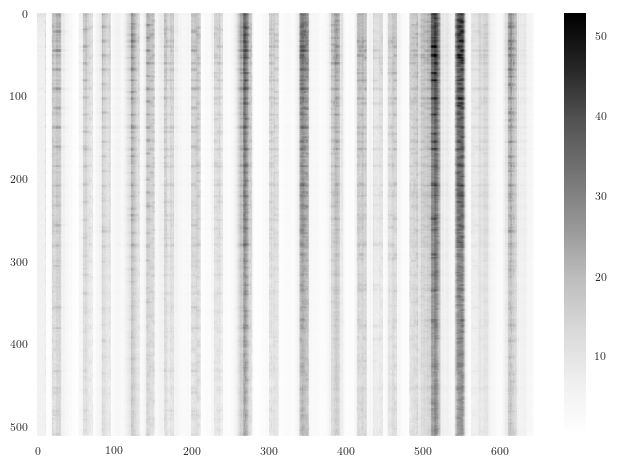

In [71]:
K = 20
L = 12

W, H = sep.fit_conv_separable(data, K, L)

plt.figure()
plt.imshow(sep.tensor_conv(W, H), aspect="auto")
plt.colorbar()
plt.grid(false)
plt.show()

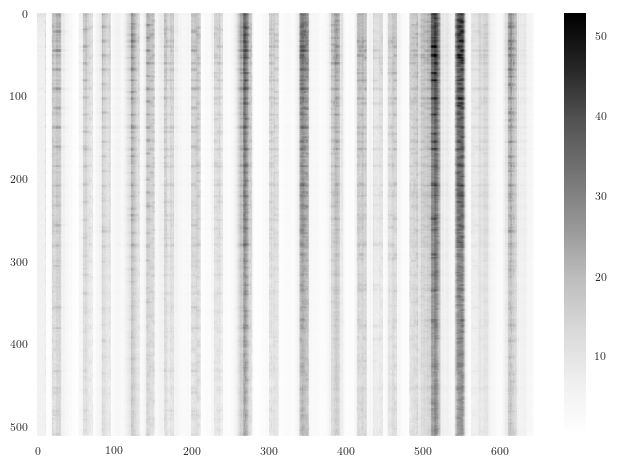

In [73]:
W2 = deepcopy(W)
CMF.ANLS._update_W!(data, W2, H)

plt.figure()
plt.imshow(sep.tensor_conv(W, H), aspect="auto")
plt.colorbar()
plt.grid(false)
plt.show()

### Plot results

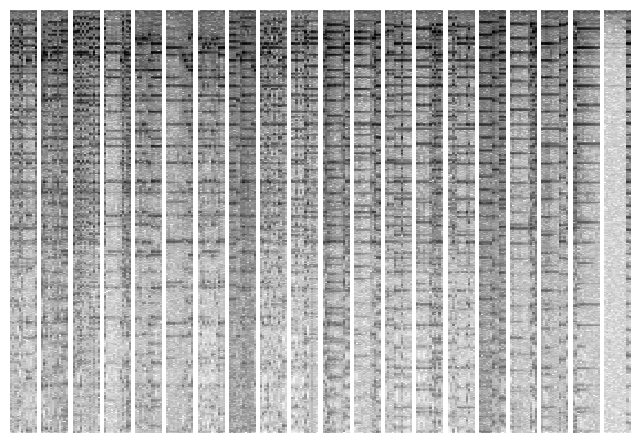

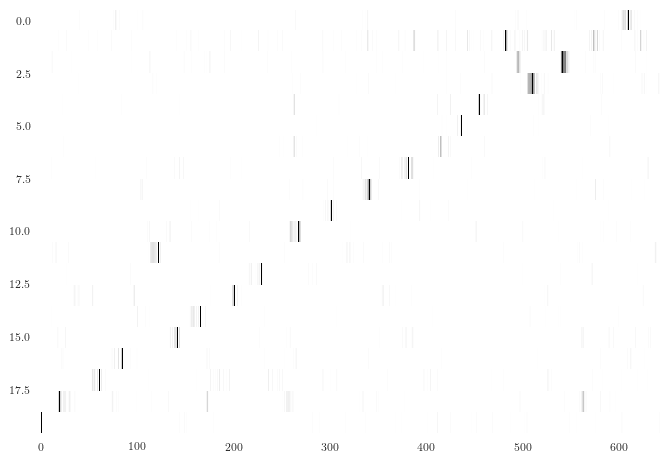

In [75]:
function plot_Ws(
    W, N, K
)
    idx = 1:N

    fig, ax = plt.subplots(1, K)
    for (k, a) in enumerate(ax)
        a.imshow(transpose(W[:, idx, k]), aspect="auto")
        a.set_xticks([])
        a.set_yticks([])
        a.grid(false)
    end

    return fig, ax
end

plt.figure()
plot_Ws(W, size(data, 1), K)
plt.show()

plt.figure()
plt.imshow(H, aspect="auto")
plt.grid(false)
plt.show()